Importing Libraries

In [10]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Bellmanford algorithm

In [18]:
N = 10**3 + 10
graph = [[0 for _ in range(N)] for _ in range(N)]
dist = [0] * N
INF = 10**9 + 10

def bellmanford(n):
    for k in range(1, n):
        for i in range(n):
            for j in range(n):
                if dist[j] > dist[i] + graph[i][j]:
                    dist[j] = dist[i] + graph[i][j]

Random number generator range between (-100,100). I have used that to insert weight of edge connection. 
This will generate 70% number 0 which means there is no edge connection between those two nodes.

In [19]:
def getRandomNumber():
    probability_zero = 0.7
    is_zero = random.random() < probability_zero
    if is_zero:
        return 0
    else:
        return random.randint(-100, 100)

Main function.  I have checked runtime from number of node from 20 to 500. and saved result in 'bellmanford.csv'

In [20]:
def main():
    number_of_node =[]
    number_of_edge =[]
    duration_ =[]
    for node in range(20, 500, 10):
        n = node
        edge = 0

        for i in range(n):
            for j in range(i + 1, n):
                rnd = getRandomNumber()
                if rnd == 0:
                    graph[i][j] = INF
                else:
                    edge += 1
                    graph[i][j] = rnd
                    graph[j][i] = rnd

        source = random.randint(0, n - 1)

        start = time.time()
        for i in range(n):
            dist[i] = INF
            graph[i][i] = 0
        dist[source] = 0

        bellmanford(n)
        stop = time.time()

        duration = (stop - start) * 10**6
        number_of_node.append(n)
        number_of_edge.append(edge)
        duration_.append(duration)
        print(f"node : {node} Edge : {edge} duration : {duration:.2f} microseconds")

    result = pd.DataFrame()
    result['Number_of_node'] = number_of_node
    result['Number_of_edge'] = number_of_edge
    result['duration'] = duration_

    result.to_csv("bellmanford.csv", index=None) 
    #records are save to bellmanford.csv file
    print("Successfully completed")
if __name__ == "__main__":
    main()

node : 20 Edge : 59 duration : 2995.73 microseconds
node : 30 Edge : 153 duration : 7998.70 microseconds
node : 40 Edge : 255 duration : 7953.17 microseconds
node : 50 Edge : 361 duration : 15957.12 microseconds
node : 60 Edge : 538 duration : 24933.10 microseconds
node : 70 Edge : 684 duration : 32911.78 microseconds
node : 80 Edge : 962 duration : 43881.89 microseconds
node : 90 Edge : 1165 duration : 60837.51 microseconds
node : 100 Edge : 1514 duration : 85769.89 microseconds
node : 110 Edge : 1765 duration : 149600.98 microseconds
node : 120 Edge : 2104 duration : 185503.01 microseconds
node : 130 Edge : 2529 duration : 239359.62 microseconds
node : 140 Edge : 2824 duration : 231424.81 microseconds
node : 150 Edge : 3418 duration : 371011.02 microseconds
node : 160 Edge : 3770 duration : 394985.20 microseconds
node : 170 Edge : 4347 duration : 522639.75 microseconds
node : 180 Edge : 4706 duration : 602348.09 microseconds
node : 190 Edge : 5281 duration : 687204.60 microseconds
no

Showing graph (Time vs number of node)

Text(0, 0.5, 'Time in microsecond')

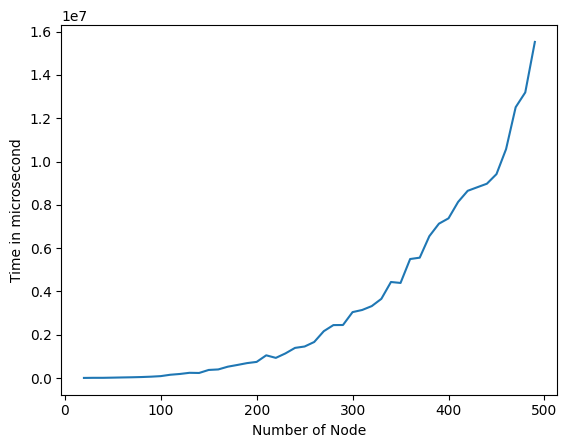

In [23]:
result=pd.read_csv('bellmanford.csv');
node=result.iloc[:,0].values
time=result.iloc[:,-1].values
edge=result.iloc[:,1].values

plt.plot(node,time)
plt.xlabel('Number of Node')
plt.ylabel('Time in microsecond')





graph (Time vs number of edge)

Text(0, 0.5, 'Time in microsecond')

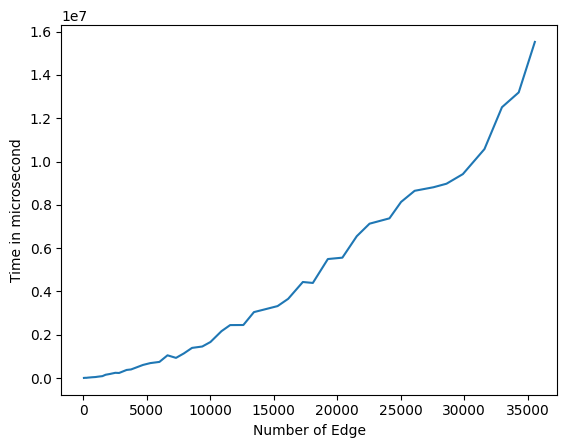

In [25]:
plt.plot(edge,time)
plt.xlabel('Number of Edge')
plt.ylabel('Time in microsecond')